<a href="https://colab.research.google.com/github/GiacomoMM/blood-cell-classification-detection/blob/main/Progetto_LabIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn as sk
import torch
import torchvision

#Data download

In [8]:
import requests
import zipfile
from pathlib import Path

data_path=Path("data/")
#se ci sono gia i dati
if data_path.is_dir():
  print("directory esiste già")
else:
  data_path.mkdir(parents=True,exist_ok=True)
  print("directory data creata")

with open(data_path / "PBC_dataset_normal_DIB_224.zip","wb") as f:
  request=requests.get("https://github.com/GiacomoMM/blood-cell-classification-detection/raw/main/PBC_dataset_normal_DIB_224.zip?download=")
  print("downloading dataset")
  f.write(request.content)

with zipfile.ZipFile(data_path / "PBC_dataset_normal_DIB_224.zip","r") as zip_f:
  print("unzipping dataset")
  zip_f.extractall(data_path)


directory esiste già
downloading dataset
unzipping dataset


In [9]:
import os
def directory(dir_path):
  for dirpath,dirname,filename in os.walk(dir_path):
    print(f"Ci sono {len(dirname)} directory e {len(filename)} immagini in {dirpath}")

In [10]:
directory(data_path)

Ci sono 1 directory e 1 immagini in data
Ci sono 8 directory e 0 immagini in data/PBC_dataset_normal_DIB_224
Ci sono 0 directory e 2348 immagini in data/PBC_dataset_normal_DIB_224/platelet
Ci sono 0 directory e 1420 immagini in data/PBC_dataset_normal_DIB_224/monocyte
Ci sono 0 directory e 1551 immagini in data/PBC_dataset_normal_DIB_224/erythroblast
Ci sono 0 directory e 2895 immagini in data/PBC_dataset_normal_DIB_224/ig
Ci sono 0 directory e 1218 immagini in data/PBC_dataset_normal_DIB_224/basophil
Ci sono 0 directory e 3329 immagini in data/PBC_dataset_normal_DIB_224/neutrophil
Ci sono 0 directory e 1214 immagini in data/PBC_dataset_normal_DIB_224/lymphocyte
Ci sono 0 directory e 3117 immagini in data/PBC_dataset_normal_DIB_224/eosinophil


#Analisi Dati

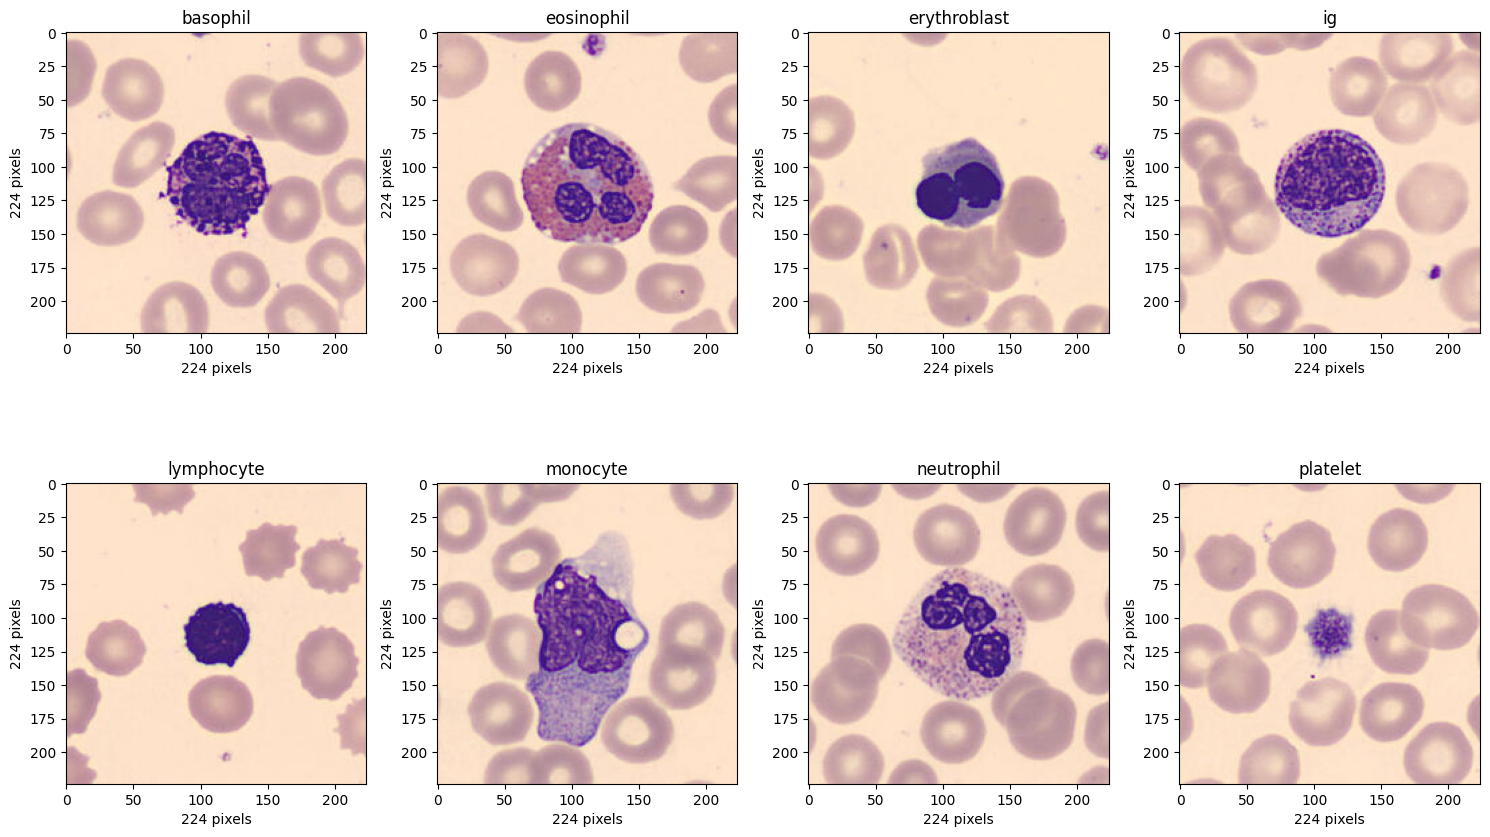

In [13]:
import random
from PIL import Image
import matplotlib.pyplot as plt

lista_path=list()
lista_classi=list()

image_basophil_path=Path("/content/data/PBC_dataset_normal_DIB_224/basophil/")
image_basophil_path_list= list(image_basophil_path.glob("*.jpg"))
random_image_basophil_path=random.choice(image_basophil_path_list)
#image_basophil=Image.open(random_image_basophil_path)
lista_classi.append(random_image_basophil_path.parent.stem)
lista_path.append(random_image_basophil_path)

image_eosinophil_path=Path("/content/data/PBC_dataset_normal_DIB_224/eosinophil/")
image_eosinophil_path_list= list(image_eosinophil_path.glob("*.jpg"))
random_image_eosinophil_path=random.choice(image_eosinophil_path_list)
#image_eosinophil=Image.open(random_image_eosinophil_path)
lista_classi.append(random_image_eosinophil_path.parent.stem)
lista_path.append(random_image_eosinophil_path)

image_erythroblast_path=Path("/content/data/PBC_dataset_normal_DIB_224/erythroblast/")
image_erythroblast_path_list= list(image_erythroblast_path.glob("*.jpg"))
random_image_erythroblast_path=random.choice(image_erythroblast_path_list)
#image_erythroblast=Image.open(random_image_erythroblast_path)
lista_classi.append(random_image_erythroblast_path.parent.stem)
lista_path.append(random_image_erythroblast_path)

image_ig_path=Path("/content/data/PBC_dataset_normal_DIB_224/ig/")
image_ig_path_list= list(image_ig_path.glob("*.jpg"))
random_image_ig_path=random.choice(image_ig_path_list)
#image_ig=Image.open(random_image_ig_path)
lista_classi.append(random_image_ig_path.parent.stem)
lista_path.append(random_image_ig_path)

image_lymphocyte_path=Path("/content/data/PBC_dataset_normal_DIB_224/lymphocyte/")
image_lymphocyte_path_list= list(image_lymphocyte_path.glob("*.jpg"))
random_image_lymphocyte_path=random.choice(image_lymphocyte_path_list)
#image_lymphocyte=Image.open(random_image_lymphocyte_path)
lista_classi.append(random_image_lymphocyte_path.parent.stem)
lista_path.append(random_image_lymphocyte_path)

image_monocyte_path=Path("/content/data/PBC_dataset_normal_DIB_224/monocyte/")
image_monocyte_path_list= list(image_monocyte_path.glob("*.jpg"))
random_image_monocyte_path=random.choice(image_monocyte_path_list)
#image_monocyte=Image.open(random_image_monocyte_path)
lista_classi.append(random_image_monocyte_path.parent.stem)
lista_path.append(random_image_monocyte_path)

image_neutrophil_path=Path("/content/data/PBC_dataset_normal_DIB_224/neutrophil/")
image_neutrophil_path_list= list(image_neutrophil_path.glob("*.jpg"))
random_image_neutrophil_path=random.choice(image_neutrophil_path_list)
#image_neutrophil=Image.open(random_image_neutrophil_path)
lista_classi.append(random_image_neutrophil_path.parent.stem)
lista_path.append(random_image_neutrophil_path)

image_platelet_path=Path("/content/data/PBC_dataset_normal_DIB_224/platelet/")
image_platelet_path_list= list(image_platelet_path.glob("*.jpg"))
random_image_platelet_path=random.choice(image_platelet_path_list)
#image_platelet=Image.open(random_image_platelet_path)
lista_classi.append(random_image_platelet_path.parent.stem)
lista_path.append(random_image_platelet_path)


plot,axs=plt.subplots(nrows=2,ncols=4,figsize=(15,15))

for i in range(8):
  image =Image.open(lista_path[i])
  ax = axs[i // 4, i % 4]
  ax.imshow(image)
  ax.set_title(f"{lista_classi[i]}")
  width, height = image.size
  ax.set_xlabel(f"{width} pixels")
  ax.set_ylabel(f"{height} pixels")

plt.tight_layout(h_pad=-26.0)
plt.show()


In [14]:
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

dataset = ImageFolder(root="/content/data/PBC_dataset_normal_DIB_224", transform=transform, allow_empty=False)
print(dataset.classes)
print(dataset.class_to_idx)
print(f"Numero totale di immagini: {len(dataset)}")


['basophil', 'eosinophil', 'erythroblast', 'ig', 'lymphocyte', 'monocyte', 'neutrophil', 'platelet']
{'basophil': 0, 'eosinophil': 1, 'erythroblast': 2, 'ig': 3, 'lymphocyte': 4, 'monocyte': 5, 'neutrophil': 6, 'platelet': 7}
Numero totale di immagini: 17092


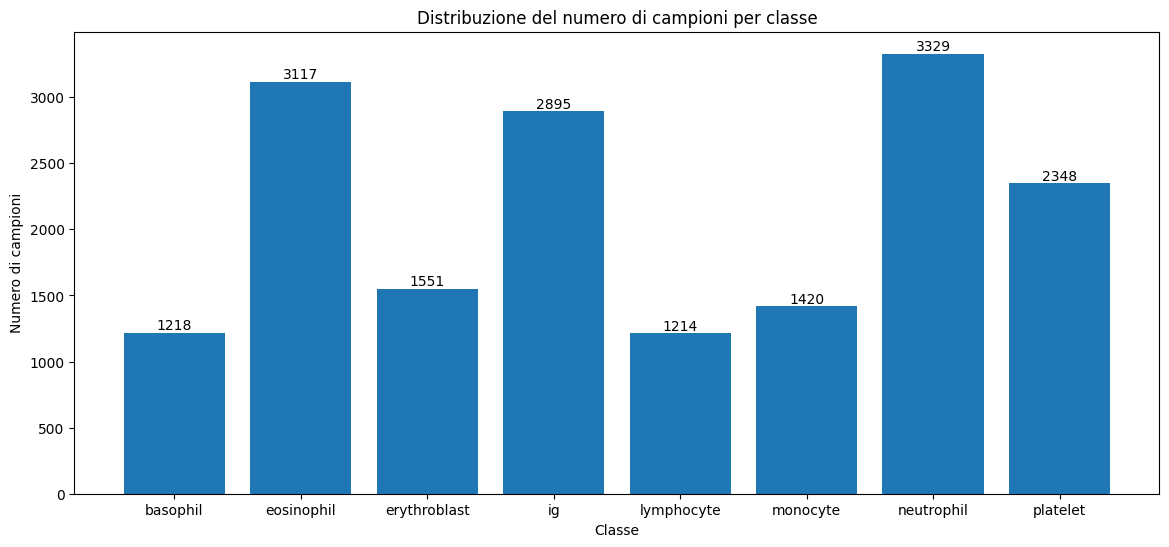

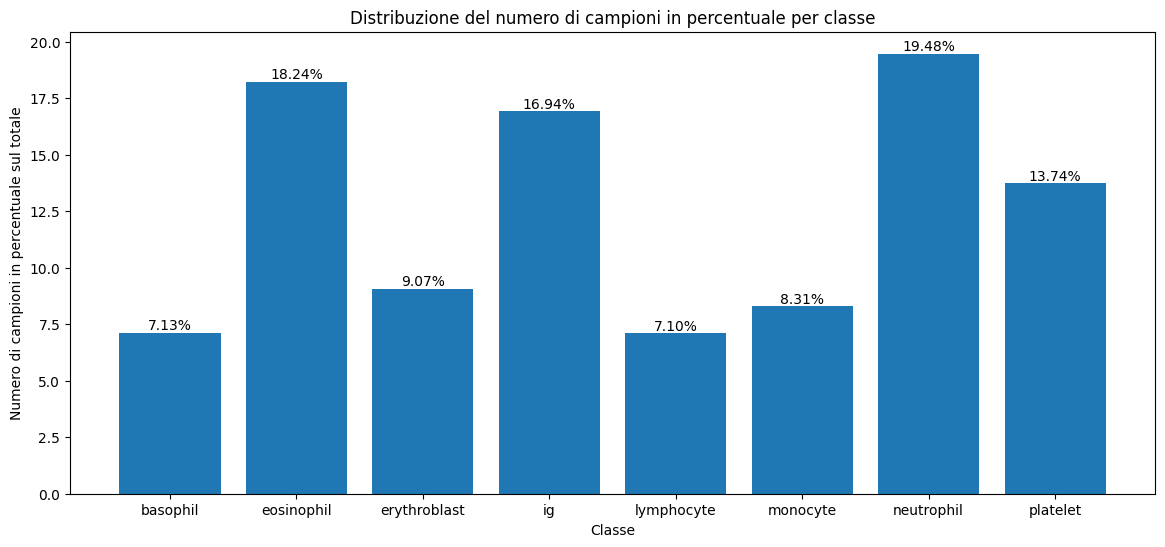

In [15]:
classes = dataset.classes
class_counts = [0]*8

for _, indx in dataset:
    class_counts[indx] += 1

plt.figure(figsize=(14, 6))
bar=plt.bar(classes, class_counts)
plt.bar_label(bar)
plt.xlabel("Classe")
plt.ylabel("Numero di campioni")
plt.title("Distribuzione del numero di campioni per classe")
plt.show()

#percentuale sul totale
for i in range(len(class_counts)):
  class_counts[i]=class_counts[i]/len(dataset)*100


plt.figure(figsize=(14, 6))
bar=plt.bar(classes, class_counts)
plt.bar_label(bar,fmt="%.2f%%")
plt.xlabel("Classe")
plt.ylabel("Numero di campioni in percentuale sul totale")
plt.title("Distribuzione del numero di campioni in percentuale per classe")
plt.show()

#Manipolazione Dati

In [16]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
print('Using PyTorch version:', torch.__version__, ' Device:', device)

torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)
    torch.cuda.manual_seed_all(42)

torch.backends.cudnn.determinstic = True
torch.backends.cudnn.benchmark = False

Using PyTorch version: 2.3.0+cu121  Device: cpu


In [17]:
from torch.utils.data import DataLoader,random_split,TensorDataset

train_size = int(0.6 * len(dataset))
val_size = int(0.2 * len(dataset))
test_size= len(dataset)-train_size-val_size

dataset_loader = DataLoader(dataset, batch_size=len(dataset), shuffle=True)

data_loader, label_loader = next(iter(dataset_loader))

dataset_mix = TensorDataset(data_loader, label_loader)

In [18]:
c_label_train=0
c_label_val=0
c_label_test=0
while(c_label_train<8 and c_label_val<8 and c_label_test<8):
  train_dataset,val_dataset,test_dataset = random_split(dataset_mix,[train_size,val_size,test_size])
  labels=[]
  for idx,(img,label) in enumerate(train_dataset):
    if label not in labels:
      labels.append(label)
      c_label_train=c_label_train+1
  print(f"c_label_train: {c_label_train}")
  labels=[]
  for idx,(img,label) in enumerate(val_dataset):
    if label not in labels:
      labels.append(label)
      c_label_val=c_label_val+1
  print(f"c_label_val: {c_label_val}")
  labels=[]
  for idx,(img,label) in enumerate(test_dataset):
    if label not in labels:
      labels.append(label)
      c_label_test=c_label_test+1
  print(f"c_label_test: {c_label_test}")

c_label_train: 8
c_label_val: 8
c_label_test: 8


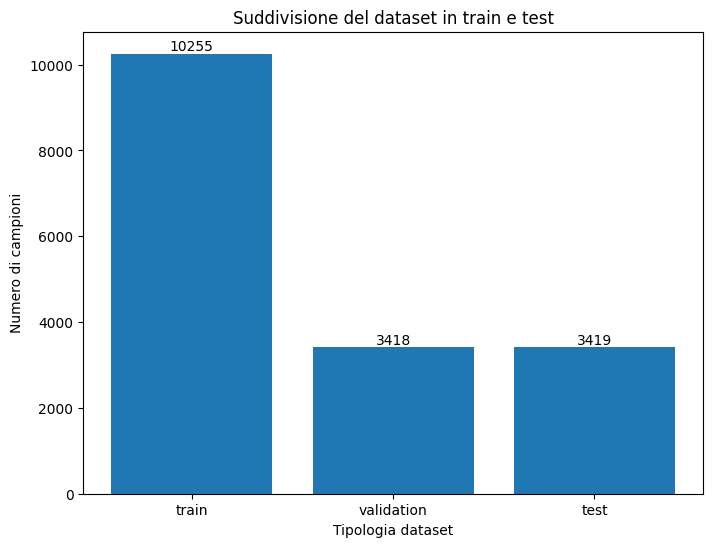

In [19]:
plt.figure(figsize=(8, 6))
bar=plt.bar(["train","validation", "test"], [len(train_dataset.indices),len(val_dataset.indices),len(test_dataset.indices)])
plt.bar_label(bar)
plt.xlabel("Tipologia dataset")
plt.ylabel("Numero di campioni")
plt.title("Suddivisione del dataset in train e test")
plt.show()

In [20]:
#DataLoader
train_loader=DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader=DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader=DataLoader(test_dataset, batch_size=64, shuffle=False)

dataiter = iter(train_loader)
images, labels = next(dataiter)
print("tipologia loader: ",type(images))
print("shape immagine: ",images.shape)
print("label shape: ",labels.shape)

tipologia loader:  <class 'torch.Tensor'>
shape immagine:  torch.Size([64, 3, 64, 64])
label shape:  torch.Size([64])


In [21]:
data = []
for idx, (image, label) in enumerate(train_dataset):
    image_np = np.asarray(image)
    data.append({
        "image": image_np.flatten(),
        "label": dataset.classes[label],
    })
train_pd = pd.DataFrame(data)
train_pd = train_pd.sample(frac=1).reset_index(drop=True)

data = []
for idx, (image, label) in enumerate(val_dataset):
    image_np = np.asarray(image)
    data.append({
        "image": image_np.flatten(),
        "label": dataset.classes[label],
    })
val_pd = pd.DataFrame(data)
val_pd = val_pd.sample(frac=1).reset_index(drop=True)

data = []
for idx, (image, label) in enumerate(test_dataset):
    image_np = np.asarray(image)
    data.append({
        "image": image_np.flatten(),
        "label": dataset.classes[label],
    })
test_pd = pd.DataFrame(data)
test_pd = val_pd.sample(frac=1).reset_index(drop=True)

train_pd.head()

,image,label
0,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",platelet
1,"[0.99607843, 0.99607843, 0.99215686, 0.9921568...",neutrophil
2,"[0.79607844, 0.80784315, 0.827451, 0.87058824,...",basophil
3,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.99607843, 0.9...",eosinophil
4,"[0.78039217, 0.7647059, 0.78431374, 0.83137256...",platelet


In [22]:
#divisione feature
X_train_pd =train_pd["image"]
y_train_pd =train_pd["label"]

X_val_pd =val_pd["image"]
y_val_pd =val_pd["label"]

X_test_pd =test_pd["image"]
y_test_pd =test_pd["label"]
print(len(y_train_pd.unique()))
print(len(y_val_pd.unique()))
print(len(y_test_pd.unique()))

8
8
8


#Modello 1: Logistic Regression

In [6]:
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#ricerca iperparametro learning rate
warnings.filterwarnings("ignore",category=ConvergenceWarning)
learning_rate=100
best_rate=[]
best_accuracy=[]
for i in range(7):
  model = LogisticRegression(max_iter=5,solver="sag",n_jobs=-1,C=learning_rate)
  model.fit(X_train_pd.to_list(), y_train_pd)
  y_pred = model.predict(X_val_pd.to_list())
  accuracy = accuracy_score(y_val_pd, y_pred)
  print(f"Accuracy: {accuracy} con learning rate: {learning_rate}")
  best_rate.append(learning_rate)
  best_accuracy.append(accuracy)
  learning_rate=learning_rate/10


NameError: name 'X_train_pd' is not defined

In [5]:
accuracy=max(best_accuracy)
idx=best_accuracy.index(accuracy)
learning_rate=best_rate[idx]
print(f"miglior accuracy: {accuracy}")
print(f"miglior rate: {learning_rate}")

plt.figure(figsize=(8, 6))
plt.plot(best_rate,best_accuracy)
plt.xscale("log")
plt.xlabel("Learning rate")
plt.ylabel("Accuracy")
plt.title("Valore accuracy in funzione learning rate")
plt.show()

ValueError: max() arg is an empty sequence

In [18]:
model = LogisticRegression(max_iter=20,solver="sag",n_jobs=-1,C=learning_rate)
model.fit(X_train_pd.to_list(), y_train_pd)
y_pred = model.predict(X_test_pd.to_list())

In [82]:
#Metriche
from sklearn.metrics import classification_report
accuracy_lr=accuracy_score(y_test_pd,y_pred)
print(f"Valore accuracy: {accuracy_lr}")

report = classification_report(y_test_pd,y_pred)
print(f"Classification Report: \n{report}")

Valore accuracy: 0.735225277940316
Classification Report: 
              precision    recall  f1-score   support

    basophil       0.62      0.32      0.42       215
  eosinophil       0.84      0.88      0.86       620
erythroblast       0.80      0.65      0.72       294
          ig       0.51      0.67      0.58       611
  lymphocyte       0.72      0.72      0.72       253
    monocyte       0.56      0.25      0.35       283
  neutrophil       0.77      0.86      0.81       665
    platelet       0.95      0.99      0.97       477

    accuracy                           0.74      3418
   macro avg       0.72      0.67      0.68      3418
weighted avg       0.73      0.74      0.72      3418



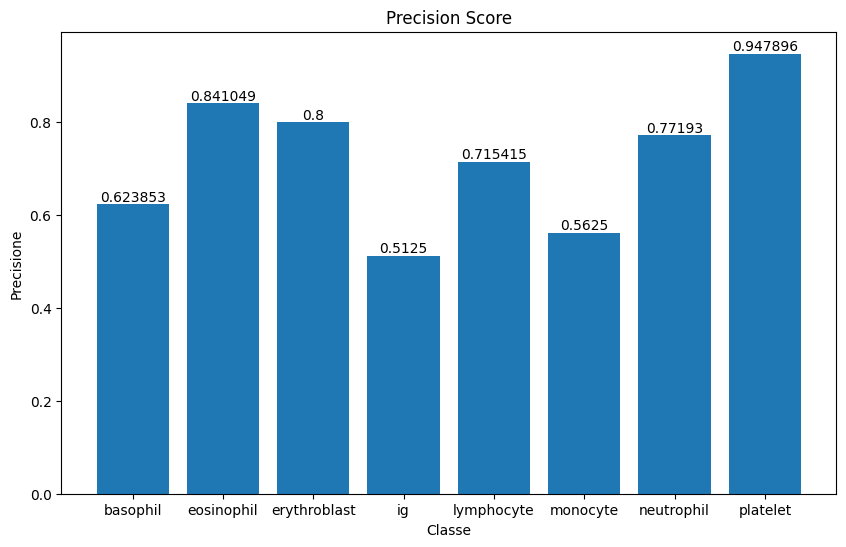

In [87]:
from sklearn.metrics import precision_score
classe=["basophil","eosinophil","erythroblast","ig","lymphocyte","monocyte","neutrophil","platelet"]
plt.figure(figsize=(10, 6))
bar=plt.bar(classe, precision_score(y_test_pd,y_pred, average=None))
plt.bar_label(bar)
plt.xlabel("Classe")
plt.ylabel("Precisione")
plt.title("Precision Score")
plt.show()

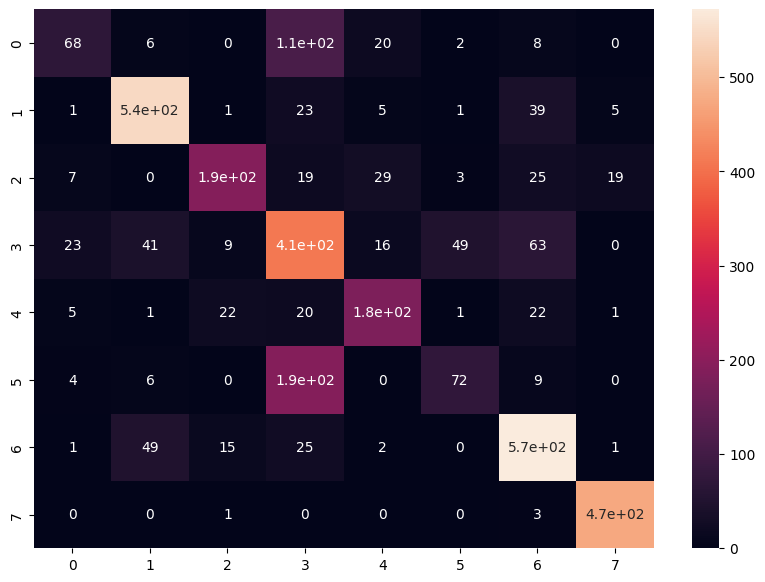

In [100]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

#plot confusion_matrix
cm = confusion_matrix(y_test_pd,y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True)
plt.show()

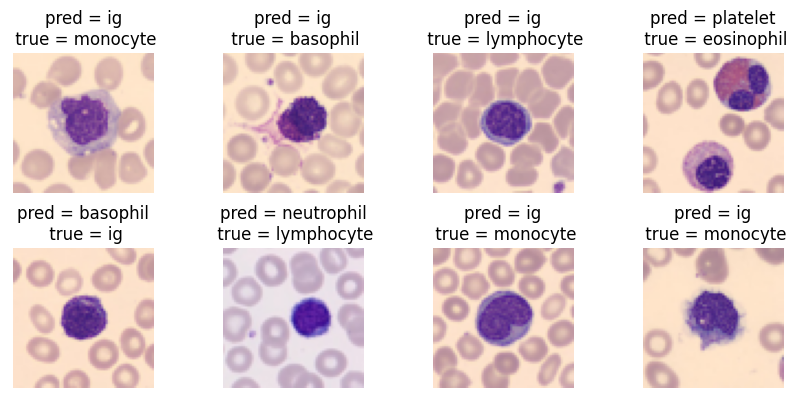

In [64]:
misclassified = np.where(y_pred != y_test_pd)[0]
plot,axs=plt.subplots(nrows=2,ncols=4,figsize=(8,8))
for i in range(8):
  ax = axs[i // 4, i % 4]
  im=X_test_pd.iloc[misclassified[i*5]]
  im=im.reshape(3,64,64).T
  ax.imshow(im)
  ax.set_title("pred = " + y_pred[misclassified[i*5]] + "\n true = " + y_test_pd.iloc[misclassified[i*5]])
  ax.axis("off")
plt.tight_layout(h_pad=-20.0,w_pad=5)
plt.show()

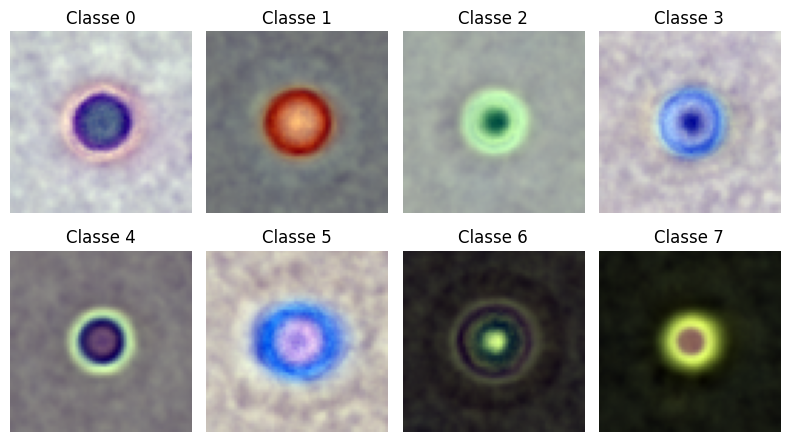

In [67]:
from sklearn.preprocessing import MinMaxScaler
#coefficienti
coefficients = model.coef_
image_shape = (3,64,64)
n_classes = coefficients.shape[0]
images = []
scaler = MinMaxScaler()

plot,axs=plt.subplots(nrows=2,ncols=4,figsize=(8,8))
for i in range(len(coefficients)):
  im = scaler.fit_transform(coefficients[i].reshape(-1, 1))
  im=im.reshape(3,64,64).T
  ax = axs[i // 4, i % 4]
  im=ax.imshow(im)
  ax.set_title(f"Classe {i}")
  ax.axis("off")
plt.tight_layout(h_pad=-15.0)
plt.show()

#Modello 2:KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier

best_k=[]
best_accuracy=[]
for i in range(1,10):
  model = KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
  model.fit(X_train_pd.to_list(), y_train_pd)
  y_pred = model.predict(X_val_pd.to_list())
  accuracy = accuracy_score(y_val_pd, y_pred)
  print(f"accuracy: {accuracy} con k: {i}")
  best_k.append(i)
  best_accuracy.append(accuracy)

accuracy: 0.5137507314218841 con k: 1
accuracy: 0.478642480983031 con k: 2
accuracy: 0.5272088940901112 con k: 3
accuracy: 0.5506143943826799 con k: 4
accuracy: 0.5570509069631363 con k: 5
accuracy: 0.5570509069631363 con k: 6
accuracy: 0.5620245757753072 con k: 7
accuracy: 0.5763604447045055 con k: 8
accuracy: 0.5787009947337625 con k: 9


miglior accuracy: 0.5787009947337625
miglior rate: 9


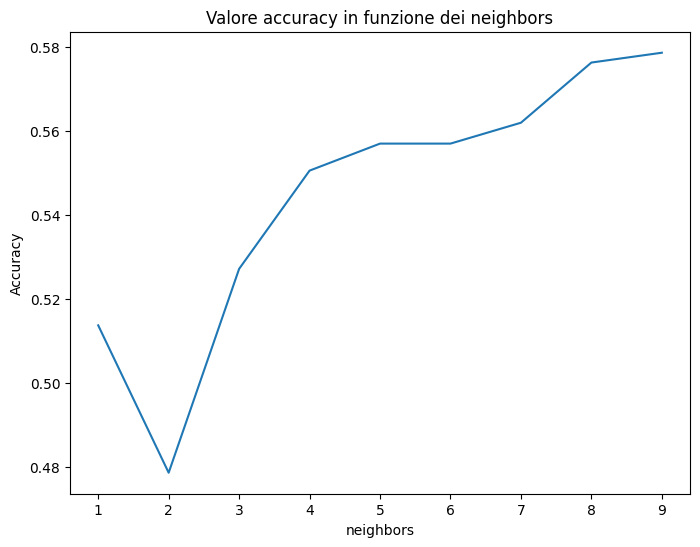

In [31]:
accuracy=max(best_accuracy)
idx=best_accuracy.index(accuracy)
k_valore=best_k[idx]
print(f"miglior accuracy: {accuracy}")
print(f"miglior rate: {k_valore}")

plt.figure(figsize=(8, 6))
plt.plot(best_k,best_accuracy)
plt.xlabel("neighbors")
plt.ylabel("Accuracy")
plt.title("Valore accuracy in funzione dei neighbors")
plt.show()

In [32]:
model = KNeighborsClassifier(n_neighbors=k_valore,n_jobs=-1)
model.fit(X_train_pd.to_list(), y_train_pd)
y_pred = model.predict(X_test_pd.to_list())

In [35]:
#Metriche
from sklearn.metrics import classification_report,precision_score
accuracy_lr=accuracy_score(y_test_pd,y_pred)
print(f"Valore accuracy: {accuracy_lr}")

report = classification_report(y_test_pd,y_pred)
print(f"Classification Report: \n{report}")

Valore accuracy: 0.5787009947337625
Classification Report: 
              precision    recall  f1-score   support

    basophil       0.37      0.48      0.42       215
  eosinophil       0.48      0.86      0.62       620
erythroblast       0.40      0.81      0.54       294
          ig       0.70      0.19      0.30       611
  lymphocyte       0.77      0.48      0.59       253
    monocyte       0.46      0.57      0.51       283
  neutrophil       0.89      0.34      0.49       665
    platelet       0.94      0.99      0.96       477

    accuracy                           0.58      3418
   macro avg       0.63      0.59      0.55      3418
weighted avg       0.67      0.58      0.56      3418



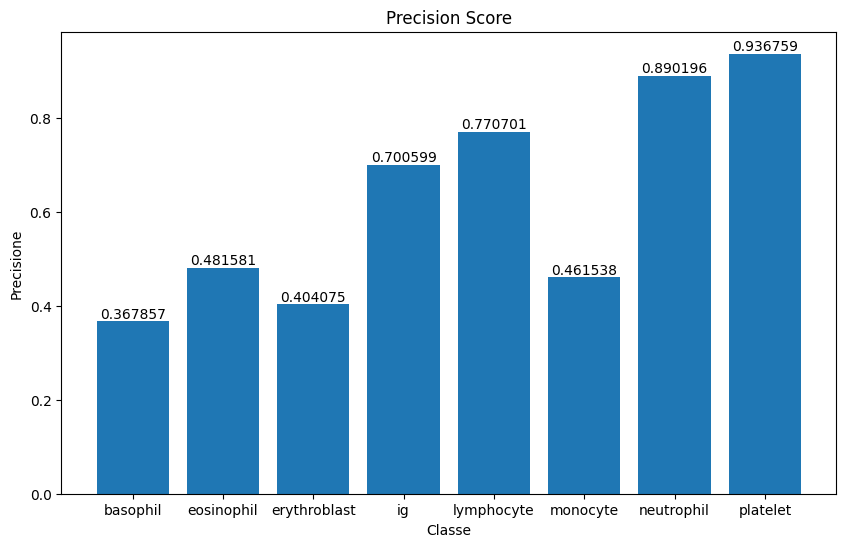

In [36]:
classe=["basophil","eosinophil","erythroblast","ig","lymphocyte","monocyte","neutrophil","platelet"]
plt.figure(figsize=(10, 6))
bar=plt.bar(classe, precision_score(y_test_pd,y_pred, average=None))
plt.bar_label(bar)
plt.xlabel("Classe")
plt.ylabel("Precisione")
plt.title("Precision Score")
plt.show()

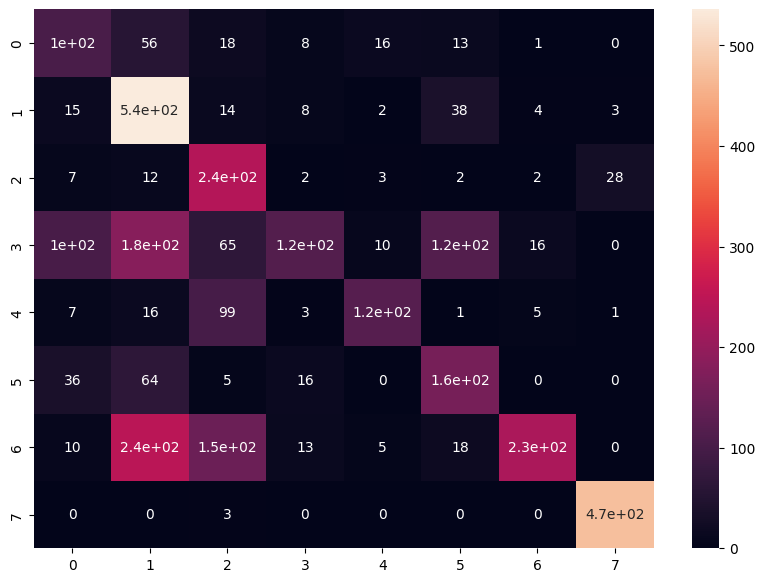

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

#plot confusion_matrix
cm = confusion_matrix(y_test_pd,y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True)
plt.show()

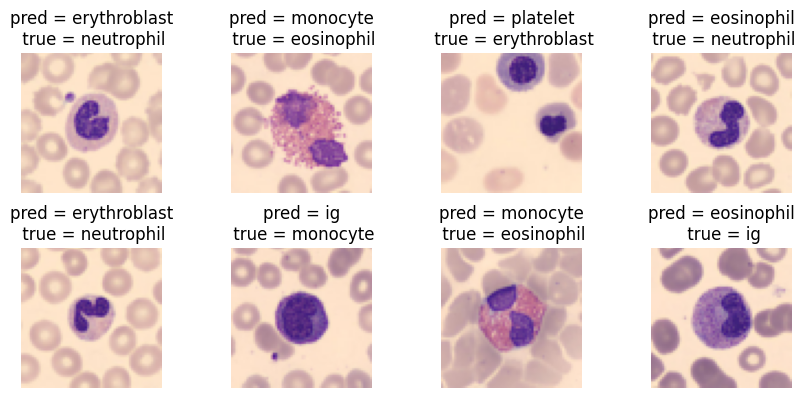

In [38]:
misclassified = np.where(y_pred != y_test_pd)[0]
plot,axs=plt.subplots(nrows=2,ncols=4,figsize=(8,8))
for i in range(8):
  ax = axs[i // 4, i % 4]
  im=X_test_pd.iloc[misclassified[i*5]]
  im=im.reshape(3,64,64).T
  ax.imshow(im)
  ax.set_title("pred = " + y_pred[misclassified[i*5]] + "\n true = " + y_test_pd.iloc[misclassified[i*5]])
  ax.axis("off")
plt.tight_layout(h_pad=-20.0,w_pad=5)
plt.show()

#Modello 3: DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

clf = clf.fit(X_train_pd.to_list(),y_train_pd)

y_pred = clf.predict(X_test_pd.to_list())

accuracy = accuracy_score(y_test_pd, y_pred)
print(f'Accuracy: {accuracy:.2f}')